# Libraries in python

In [2]:
import pandas as pd
import seaborn as sns 
%matplotlib inline

# Missing Data

In statistics, missing data, or missing values, occur when no data value is stored for the variable in an observation. Here we visualize the missing values using Heatmap function. Heat map is an Axes-level function who plot rectangular data as a color-encoded matrix.

In [3]:
Titanic=pd.read_csv('/Users/atousa/Desktop/McMaster/Dataset/titanic_train_missing_data.csv',sep=',')
Titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


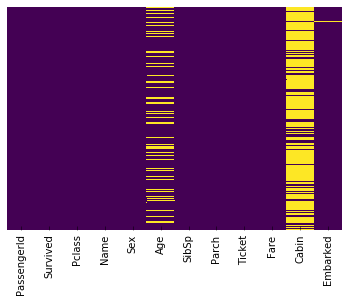

In [13]:
sns.heatmap(Titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Here we see that the majority of the cabin data are missing, therefore we remove this column as it does not give us any information 

In [ ]:
Titanic.drop('Cabin',axis=1,inplace=True)

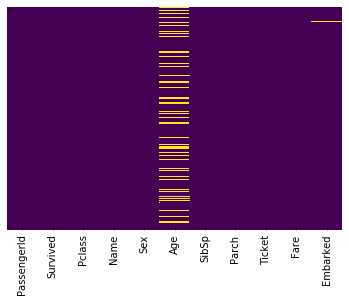

In [15]:
sns.heatmap(Titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Here we remove the rows carries the mising data as we have enough data to process

In [16]:
Titanic.dropna(axis=0,inplace=True)

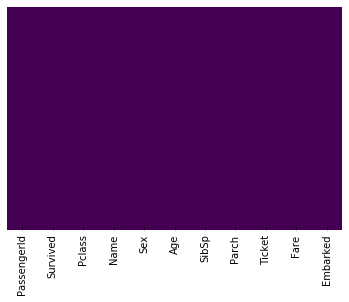

In [17]:
sns.heatmap(Titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Data prepration-Categorical to Numeric 

In many practical Data Science activities, the data set will contain categorical variables. These variables are typically stored as text values which represent various traits. Some examples include color (“Red”, “Yellow”, “Blue”), size (“Small”, “Medium”, “Large”) or geographic designations (State or Country). Regardless of what the value is used for, the challenge is determining how to use this data in the analysis. Many machine learning algorithms can support categorical values without further manipulation but there are many more algorithms that do not. Therefore, the analyst is faced with the challenge of figuring out how to turn these text attributes into numerical values for further processing.

The basic and most common strategy is to convert each category value into a new column and assigns a 1 or 0 (True/False) value to the column. Pandas supports this feature using get_dummies. This function is named this way because it creates dummy/indicator variables (aka 1 or 0).

In [18]:
Titanic.head(n=5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [25]:
sex = pd.get_dummies(Titanic['Sex'],drop_first=True)
Embarked = pd.get_dummies(Titanic['Embarked'],drop_first=True)

In [28]:
Titanic.drop(['Sex','Embarked'],axis=1,inplace=True)

In [30]:
Titanic=pd.concat([Titanic, sex,Embarked], axis=1)

In [31]:
Titanic.head(n=5)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1
